In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = 'C:\\Users\\Greg\\ML\\Technical\\project\\git2\\monophonic_classfication_cnn\\padded'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
print(all_targets)

['A#3', 'A#4', 'A3', 'A4', 'B3', 'B4', 'C#3', 'C#4', 'C3', 'C4', 'D#3', 'D#4', 'D3', 'D4', 'E3', 'E4', 'F#3', 'F#4', 'F3', 'F4', 'G3', 'G4']


In [3]:
# Settings
feature_sets_path = 'C:\\Users\\Greg\\ML\\Technical\\project\\git2\\monophonic_classfication_cnn\\audioScripts'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'wake_word_A#3_model.h5'
#wake_word = 'A#3'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1024, 16, 16)
(128, 16, 16)
(128, 16, 16)


In [7]:
# Peek at labels
print(y_val)

[21.  9. 13.  0.  0. 10. 13. 13.  0. 13. 10.  9. 15.  0.  9. 18.  0. 20.
 11. 13.  8.  6. 12.  4.  2.  3.  7. 11.  5.  1.  5. 11.  4.  2.  8.  1.
  5.  2.  3.  6. 10.  7. 11. 13.  2. 17.  5. 11.  3.  5. 13.  2.  5. 10.
  5. 12.  9.  4.  8.  9. 18. 15.  4.  9.  4.  4.  6.  0.  5.  1.  4. 11.
 10. 13.  3.  4. 17. 15.  4. 20.  4. 15. 19.  5. 14. 21. 11.  6.  5. 11.
 20.  2.  1.  0.  2.  5.  3. 10. 17.  5.  3.  1. 17.  1. 20. 12. 17.  0.
 11. 14.  6.  4. 11. 10. 15.  0. 20. 14. 19. 13.  4.  0. 21. 18.  6. 11.
  8. 19.]


In [8]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
wake_word_index = all_targets.index(wake_word)
y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [9]:
# Peek at labels after conversion
print(y_val)

[21.  9. 13.  0.  0. 10. 13. 13.  0. 13. 10.  9. 15.  0.  9. 18.  0. 20.
 11. 13.  8.  6. 12.  4.  2.  3.  7. 11.  5.  1.  5. 11.  4.  2.  8.  1.
  5.  2.  3.  6. 10.  7. 11. 13.  2. 17.  5. 11.  3.  5. 13.  2.  5. 10.
  5. 12.  9.  4.  8.  9. 18. 15.  4.  9.  4.  4.  6.  0.  5.  1.  4. 11.
 10. 13.  3.  4. 17. 15.  4. 20.  4. 15. 19.  5. 14. 21. 11.  6.  5. 11.
 20.  2.  1.  0.  2.  5.  3. 10. 17.  5.  3.  1. 17.  1. 20. 12. 17.  0.
 11. 14.  6.  4. 11. 10. 15.  0. 20. 14. 19. 13.  4.  0. 21. 18.  6. 11.
  8. 19.]


In [10]:
# What percentage of 'stop' appear in validation labels
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

8.609375
-7.609375


In [11]:
# View the dimensions of our input data
print(x_train.shape)

(1024, 16, 16)


In [12]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1024, 16, 16, 1)
(128, 16, 16, 1)
(128, 16, 16, 1)


In [13]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [14]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [16]:
# Add training parameters to model
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [17]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/30
11/11 [==============================] - 2s 38ms/step - loss: -367.0662 - acc: 0.0459 - val_loss: -1179.8192 - val_acc: 0.0469
Epoch 2/30
11/11 [==============================] - 0s 16ms/step - loss: -3882.0093 - acc: 0.0479 - val_loss: -7067.3525 - val_acc: 0.0469
Epoch 3/30
11/11 [==============================] - 0s 16ms/step - loss: -15592.6484 - acc: 0.0479 - val_loss: -22061.3535 - val_acc: 0.0469
Epoch 4/30
11/11 [==============================] - 0s 15ms/step - loss: -42496.7969 - acc: 0.0479 - val_loss: -52993.6680 - val_acc: 0.0469
Epoch 5/30
11/11 [==============================] - 0s 15ms/step - loss: -92088.3281 - acc: 0.0479 - val_loss: -104386.5156 - val_acc: 0.0469
Epoch 6/30
11/11 [==============================] - 0s 15ms/step - loss: -171470.8438 - acc: 0.0479 - val_loss: -187143.3125 - val_acc: 0.0469
Epoch 7/30
11/11 [==============================] - 0s 15ms/step - loss: -294883.0312 - acc: 0.0479 - val_loss: -311967.0625 - val_acc: 0.0469
Epoch 8/30
11

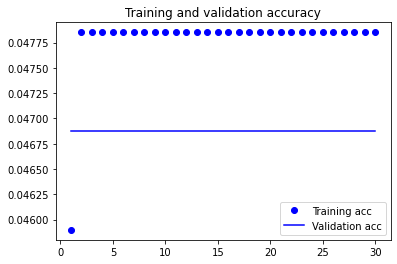

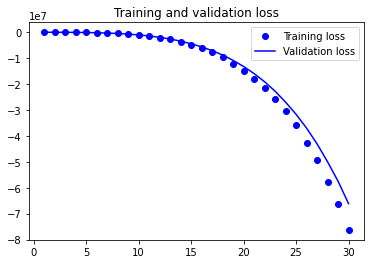

In [18]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# Save the model as a file
models.save_model(model, model_filename)

In [20]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

13
16
29
33
35
42
45
93
112
122


In [21]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(100, 110):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

1/1 [==============================] - 0s 125ms/step
Answer: 0.0  Prediction: [[1.]]
1/1 [==============================] - 0s 19ms/step
Answer: 8.0  Prediction: [[1.]]
1/1 [==============================] - 0s 18ms/step
Answer: 18.0  Prediction: [[1.]]
1/1 [==============================] - 0s 19ms/step
Answer: 16.0  Prediction: [[1.]]
1/1 [==============================] - 0s 21ms/step
Answer: 2.0  Prediction: [[1.]]
1/1 [==============================] - 0s 25ms/step
Answer: 3.0  Prediction: [[1.]]
1/1 [==============================] - 0s 20ms/step
Answer: 5.0  Prediction: [[1.]]
1/1 [==============================] - 0s 19ms/step
Answer: 12.0  Prediction: [[1.]]
1/1 [==============================] - 0s 19ms/step
Answer: 19.0  Prediction: [[1.]]
1/1 [==============================] - 0s 19ms/step
Answer: 0.0  Prediction: [[1.]]


In [22]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

4/4 [==============================] - 0s 4ms/step - loss: -78574472.0000 - acc: 0.0781


[-78574472.0, 0.078125]